In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
RESULT_PATH = "../results/stats_pruning_libraries_2.txt"
RESULT_PATH = "../results/stats_pruning_cedar.txt"
RESULT_PATH = "../results/stats_pruning_dafnyVMC.txt"
df = pd.read_csv(RESULT_PATH)

In [3]:
FILEPATH_NON_VERIFIED = "../results/non_verified.csv"
nan_count = df["Time difference"].isna().sum()
print(f"Total number of assert removed: {nan_count}/{len(df)}")
df_non_verified = df[df["Time difference"].isna()]
df_non_verified.to_csv(FILEPATH_NON_VERIFIED, index=False)

Total number of assert removed: 32/90


In [4]:
df

,Index,File,Method,Assertion,Time difference,File new method,New method time,New method result,Old method time
0,1,/exp/test_projects/Dafny-VMC/src/Math/Helper.dfy,DivModIsUnique,assert n == b;\n,-0.192021,/exp/test_projects/Dafny-VMC/src/Math/DivModIs...,3.305391,True,3.113370
1,2,/exp/test_projects/Dafny-VMC/src/Math/Helper.dfy,DivModAddDenominator,assert 0 == m * zp + ((n + m) % m) - (n % m);\n,NaN,/exp/test_projects/Dafny-VMC/src/Math/DivModAd...,7.358473,False,3.282471
2,3,/exp/test_projects/Dafny-VMC/src/Math/Rational...,FloorIsCorrect,assert r.numer == multiple + r.numer % r.denom;\n,1.096890,/exp/test_projects/Dafny-VMC/src/Math/FloorIsC...,5.157463,True,6.254353
3,4,/exp/test_projects/Dafny-VMC/src/Math/Rational...,FloorIsCorrect,assert Floor(r) as real <= ToReal(r);\n,NaN,/exp/test_projects/Dafny-VMC/src/Math/FloorIsC...,6.651491,False,6.254353
4,5,/exp/test_projects/Dafny-VMC/src/Math/Rational...,FloorIsCorrect,assert r.numer < nextMultiple;\n,NaN,/exp/test_projects/Dafny-VMC/src/Math/FloorIsC...,6.072436,False,6.254353
...,...,...,...,...,...,...,...,...,...
85,94,/exp/test_projects/Dafny-VMC/src/Probabilistic...,EnsureUntilTerminates,assert (iset s | proposalIsAccepted(s)) == (is...,NaN,/exp/test_projects/Dafny-VMC/src/Probabilistic...,4.129366,False,3.217926
86,95,/exp/test_projects/Dafny-VMC/src/Probabilistic...,WhileUnrollIfDiverges,assert unrolled == Monad.Diverging;\n,0.813095,/exp/test_projects/Dafny-VMC/src/Probabilistic...,2.931604,True,3.744699
87,96,/exp/test_projects/Dafny-VMC/src/Probabilistic...,WhileUnrollIfConditionSatisfied,assert fuel >= 1;\n,0.113004,/exp/test_projects/Dafny-VMC/src/Probabilistic...,3.761649,True,3.874653
88,97,/exp/test_projects/Dafny-VMC/src/Probabilistic...,WhileUnrollIfConditionSatisfied,"assert WhileCutTerminatesWithFuel(condition, b...",NaN,/exp/test_projects/Dafny-VMC/src/Probabilistic...,3.556905,False,3.874653


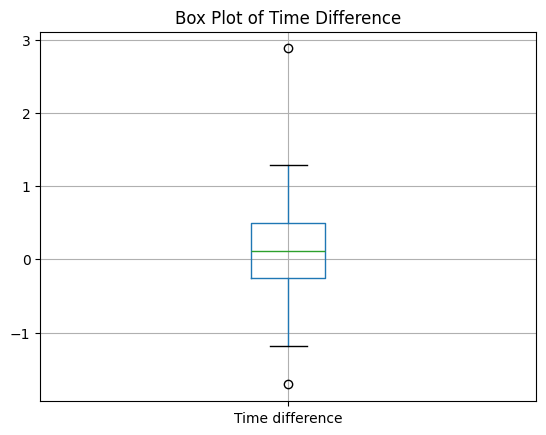

In [5]:
df.boxplot(column=["Time difference"])

# Add labels and title
plt.title("Box Plot of Time Difference")

# Show the plot
plt.show()

In [6]:
THRESHOLD = 0.1
over_threshold = (df["Time difference"] > THRESHOLD).sum()
count_under_threshold = (df["Time difference"] < -THRESHOLD).sum()

print(f"Number of assert removed over threshold: {over_threshold}/{len(df)}")
print(f"Number of assert removed under threshold: {count_under_threshold}/{len(df)}")

over_threshold

Number of assert removed over threshold: 33/90
Number of assert removed under threshold: 18/90


33

In [7]:
df[df["Time difference"] > THRESHOLD]

,Index,File,Method,Assertion,Time difference,File new method,New method time,New method result,Old method time
2,3,/exp/test_projects/Dafny-VMC/src/Math/Rational...,FloorIsCorrect,assert r.numer == multiple + r.numer % r.denom;\n,1.096890,/exp/test_projects/Dafny-VMC/src/Math/FloorIsC...,5.157463,True,6.254353
6,7,/exp/test_projects/Dafny-VMC/src/Math/Measures...,PosCountAddImpliesAdd,"assert IsCountablyAdditive(eventSpace, Prob);\n",0.153024,/exp/test_projects/Dafny-VMC/src/Math/PosCount...,6.300450,True,6.453474
9,10,/exp/test_projects/Dafny-VMC/src/Math/Analysis...,LimitOfInverseHelper2,assert AbsLimit > 0.0;\n,0.102103,/exp/test_projects/Dafny-VMC/src/Math/Analysis...,3.245127,True,3.347230
10,11,/exp/test_projects/Dafny-VMC/src/Math/Analysis...,OneOverNPlus1ConvergesToZero,assert Sequences.OneOverNPlus1(n) > 0.0;\n,0.122145,/exp/test_projects/Dafny-VMC/src/Math/Analysis...,3.276514,True,3.398659
11,12,/exp/test_projects/Dafny-VMC/src/Math/Analysis...,OneOverNPlus1ConvergesToZero,assert RealArith.Dist(Sequences.OneOverNPlus1(...,0.115696,/exp/test_projects/Dafny-VMC/src/Math/Analysis...,3.282963,True,3.398659
16,17,/exp/test_projects/Dafny-VMC/src/Math/Analysis...,BoundOfConvergentSequence,assert forall n: nat | n < N :: RealArith.Abs(...,0.197809,/exp/test_projects/Dafny-VMC/src/Math/Analysis...,4.058273,True,4.256082
24,25,/exp/test_projects/Dafny-VMC/src/Math/Analysis...,OneOverNPlus1IsAntimonotonic,assert mp1 > 0.0;\n,0.588832,/exp/test_projects/Dafny-VMC/src/Math/Analysis...,3.410182,True,3.999014
28,29,/exp/test_projects/Dafny-VMC/src/Math/Analysis...,Sqrt2Exists,assert 1.0 <= sqrt2 <= 2.0;\n,0.193563,/exp/test_projects/Dafny-VMC/src/Math/Analysis...,3.954275,True,4.147838
32,33,/exp/test_projects/Dafny-VMC/src/Math/Analysis...,Sqrt2Exists,assert false;\n,0.149672,/exp/test_projects/Dafny-VMC/src/Math/Analysis...,3.998166,True,4.147838
36,37,/exp/test_projects/Dafny-VMC/src/Math/Analysis...,Sqrt2Exists,assert false;\n,0.298289,/exp/test_projects/Dafny-VMC/src/Math/Analysis...,3.849549,True,4.147838
